In [1]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# EDA

In [3]:
df = pd.read_csv ('/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
for col in df.columns:
    print(f"Distribusi setiap value pada kolom '{col}':")
    print(df[col].value_counts())
    print ("-" * 50)

Distribusi setiap value pada kolom 'sex':
sex
Male      526415
Female    464931
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'age':
age
40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'height':
height
160    181809
165    178228
170    166328
155    165678
150    107929
175     98850
145     39176
180     35970
140      9100
185      6588
135      1241
190       363
130        86
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'weight':
weight
60     151134
55     150415
65     141241
50     125079
70     122281
75      90207
45      63047
80      58176
85      33708
90      18250
40      16639
95       9655
100    

In [8]:
print(df.duplicated().sum())
df = df.drop_duplicates()

26


DRK_YN
N    495844
Y    495476
Name: count, dtype: int64


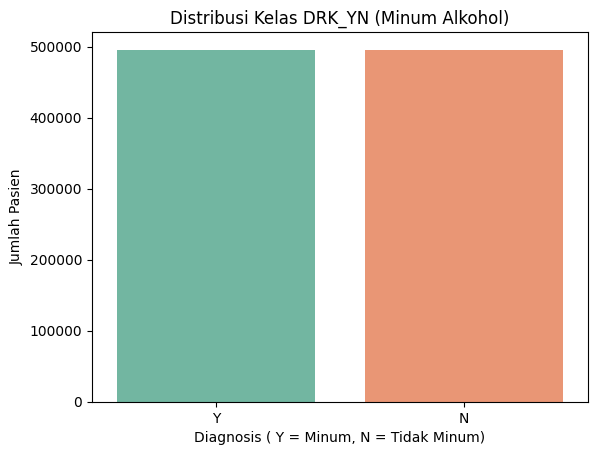

In [9]:
print(df['DRK_YN'].value_counts())

sns.countplot(x='DRK_YN', data=df, palette='Set2')
plt.title('Distribusi Kelas DRK_YN (Minum Alkohol)')
plt.xlabel('Diagnosis ( Y = Minum, N = Tidak Minum)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [10]:
kolom_numerik = [
    'age', 'height', 'weight', 'waistline',
    'sight_left', 'sight_right',
    'SBP', 'DBP', 'BLDS',
    'tot_chole', 'HDL_chole', 'LDL_chole',
    'triglyceride', 'hemoglobin', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

kolom_kategorikal_nominal = ['sex']
kolom_kategorikal_ordinal = ['hear_left', 'hear_right', 'SMK_stat_type_cd', 'urine_protein']
kolom_target = 'DRK_YN'

cek outlier metode *IQR*

Jumlah outlier pada kolom age: 0
Jumlah outlier pada kolom height: 86
Jumlah outlier pada kolom weight: 19217
Jumlah outlier pada kolom waistline: 4416
Jumlah outlier pada kolom sight_left: 11581
Jumlah outlier pada kolom sight_right: 10495
Jumlah outlier pada kolom SBP: 15835
Jumlah outlier pada kolom DBP: 13121
Jumlah outlier pada kolom BLDS: 64198
Jumlah outlier pada kolom tot_chole: 11298
Jumlah outlier pada kolom HDL_chole: 13858
Jumlah outlier pada kolom LDL_chole: 10098
Jumlah outlier pada kolom triglyceride: 54098
Jumlah outlier pada kolom hemoglobin: 9760
Jumlah outlier pada kolom serum_creatinine: 8005
Jumlah outlier pada kolom SGOT_AST: 67614
Jumlah outlier pada kolom SGOT_ALT: 72928
Jumlah outlier pada kolom gamma_GTP: 94141


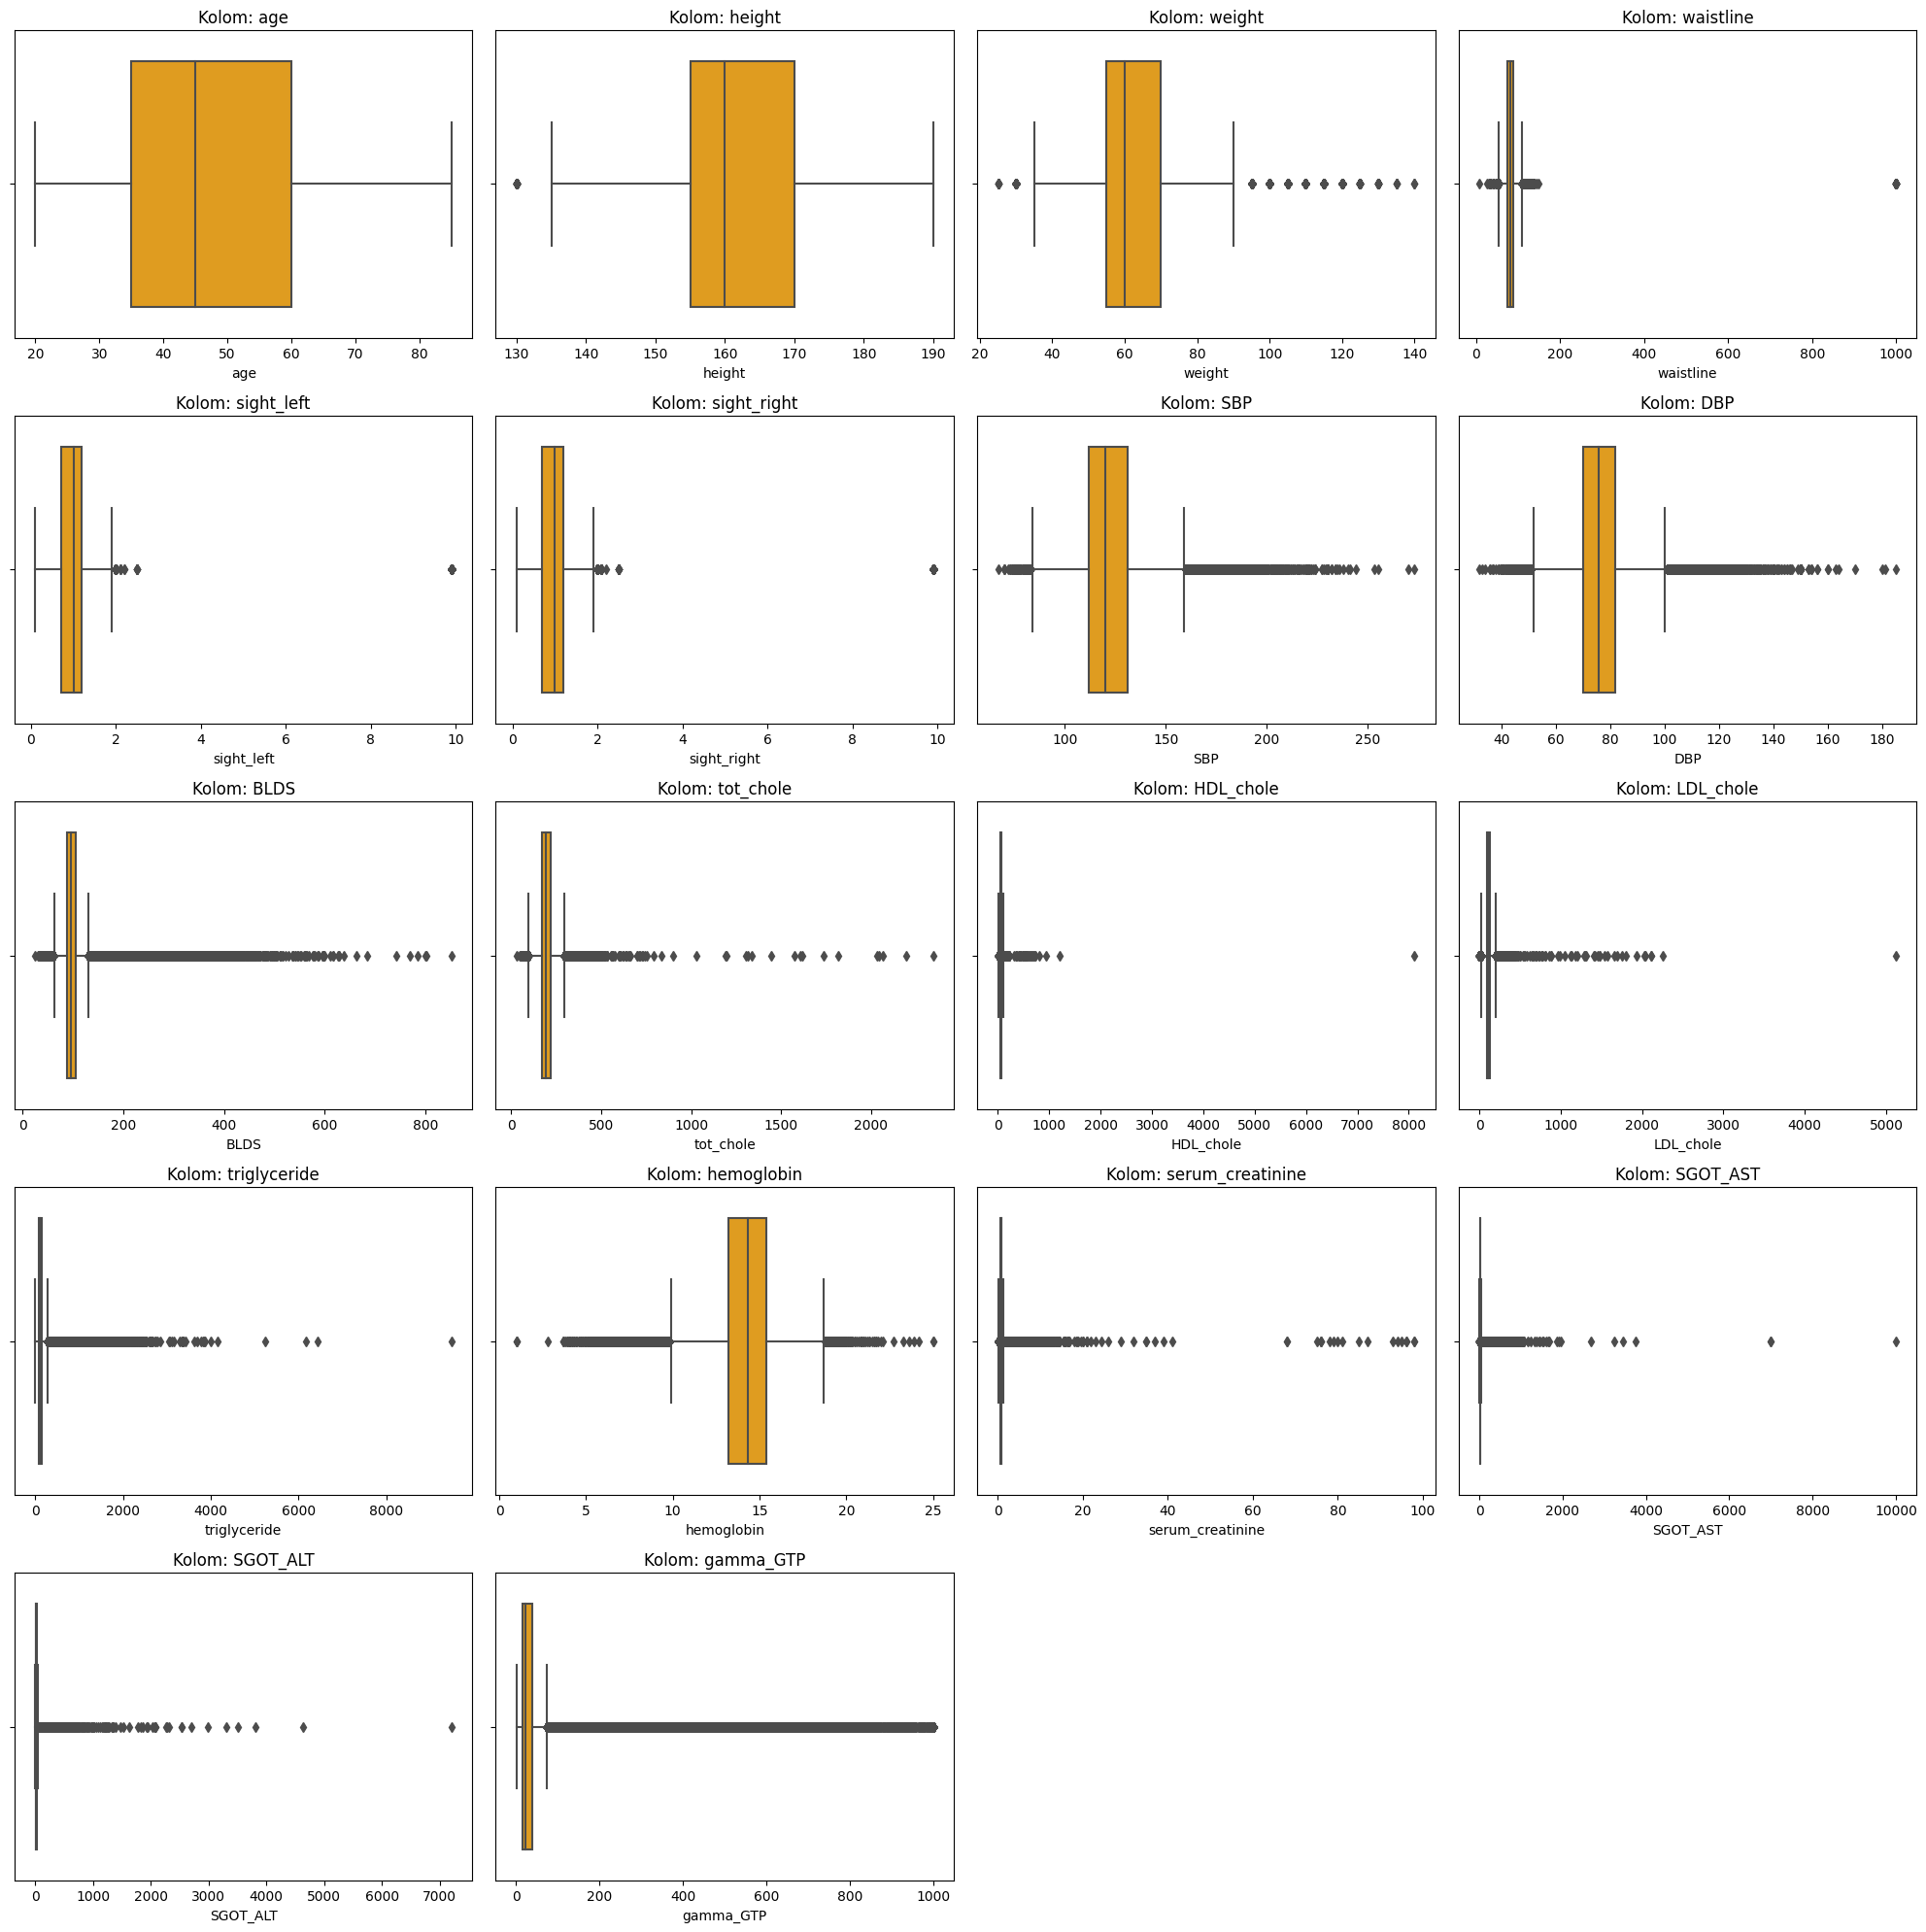


Jumlah total nilai outlier dari semua kolom: 480749
Jumlah baris unik yang mengandung outlier: 291427


In [11]:
def deteksi_outlier_iqr(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    outlier = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]
    return outlier

total_outlier = 0
outlier_index_set = set()

n_cols = 4
n_rows = (len(kolom_numerik) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, kolom in enumerate(kolom_numerik):
    outliers = deteksi_outlier_iqr(df, kolom)
    jumlah_outlier = len(outliers)
    total_outlier += jumlah_outlier
    outlier_index_set.update(outliers.index)

    print(f"Jumlah outlier pada kolom {kolom}: {jumlah_outlier}")

    sns.boxplot(data=df, x=kolom, ax=axes[i], color='orange')
    axes[i].set_title(f"Kolom: {kolom}")

for j in range(len(kolom_numerik), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f"\nJumlah total nilai outlier dari semua kolom: {total_outlier}")
print(f"Jumlah baris unik yang mengandung outlier: {len(outlier_index_set)}")

Terapkan Winsorization (1%–99%)

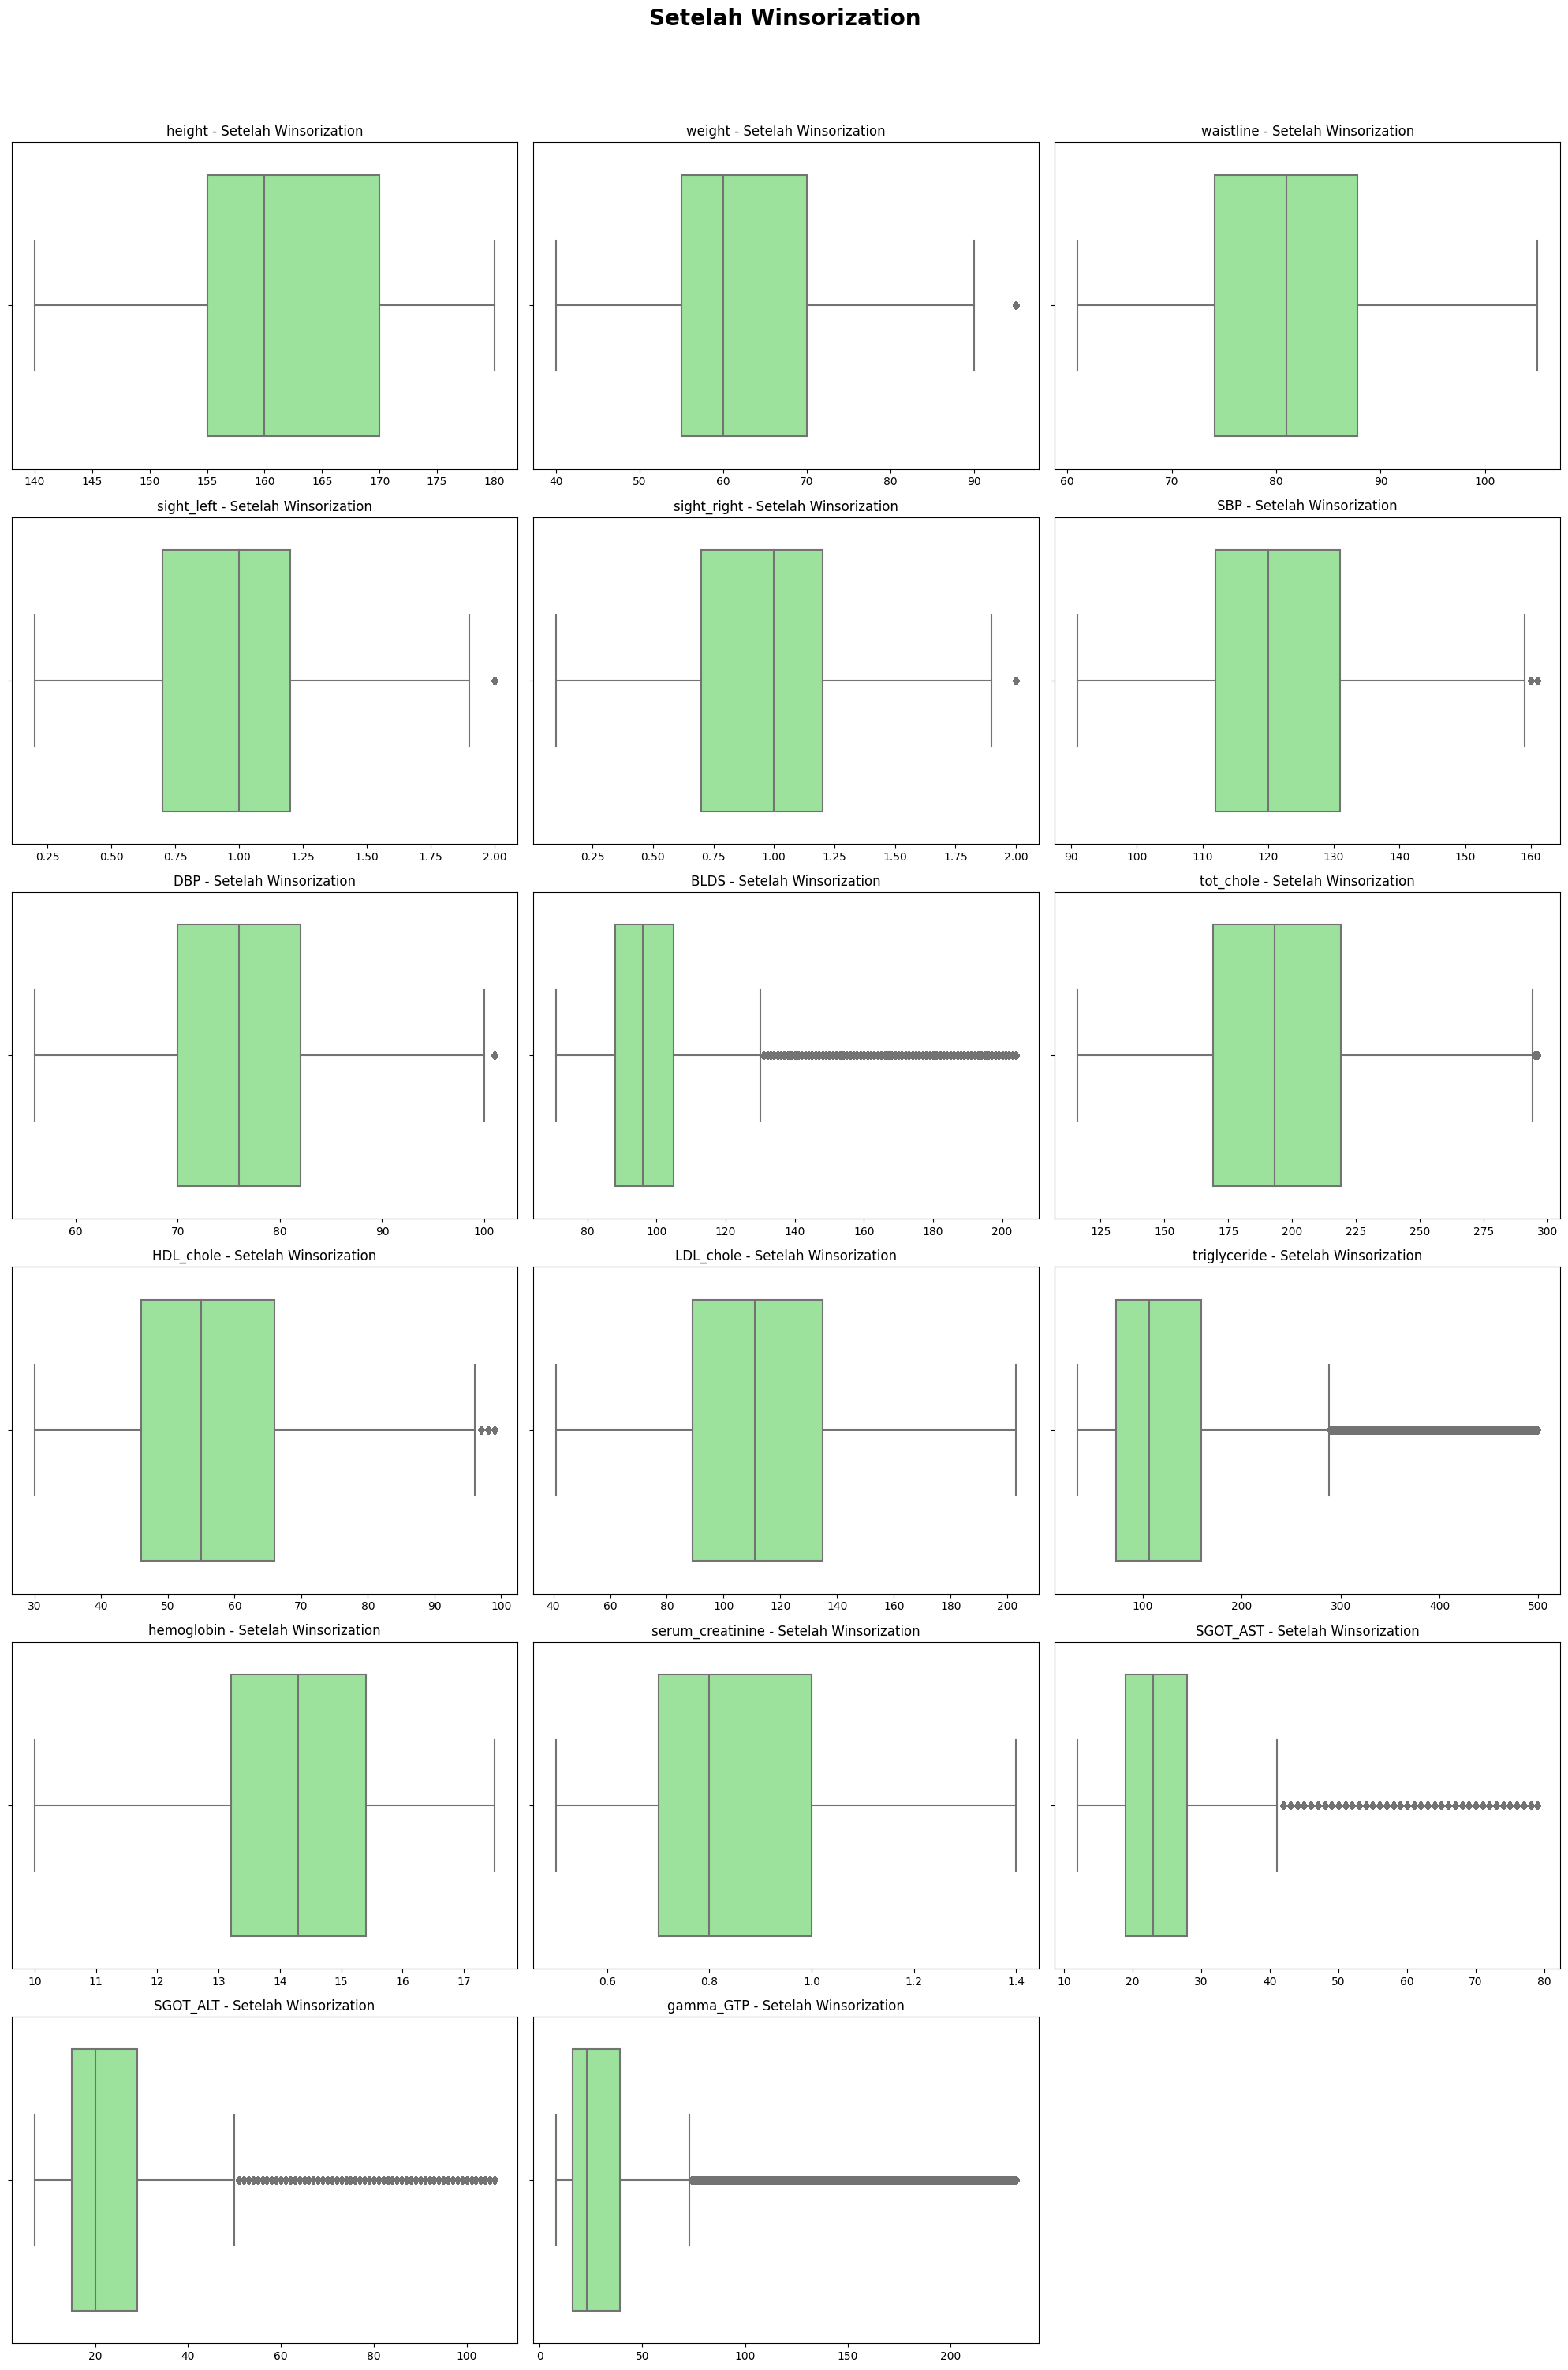

In [12]:
kolom_outlier = [
    'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP',
    'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride',
    'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

for col in kolom_outlier:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df.loc[:, col] = np.clip(df[col], lower, upper)

plt.figure(figsize=(20, 30))
for i, col in enumerate(kolom_outlier):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"{col} - Setelah Winsorization", fontsize=12)
    plt.xlabel("")

plt.suptitle("Setelah Winsorization", fontsize=20, fontweight='bold', y=1)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [13]:
print("Jumlah outlier tersisa setelah Winsorization:\n")

for col in kolom_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outlier")


Jumlah outlier tersisa setelah Winsorization:

height: 0 outlier
weight: 19051 outlier
waistline: 0 outlier
sight_left: 11581 outlier
sight_right: 10495 outlier
SBP: 15349 outlier
DBP: 10868 outlier
BLDS: 62755 outlier
tot_chole: 10577 outlier
HDL_chole: 13708 outlier
LDL_chole: 0 outlier
triglyceride: 54098 outlier
hemoglobin: 0 outlier
serum_creatinine: 0 outlier
SGOT_AST: 67498 outlier
SGOT_ALT: 72928 outlier
gamma_GTP: 94141 outlier


In [14]:
cols_to_log = [
    "weight",
    "sight_left",
    "sight_right",
    "SBP",
    "DBP",
    "BLDS",
    "tot_chole",
    "HDL_chole",
    "triglyceride",
    "SGOT_AST",
    "SGOT_ALT",
    "gamma_GTP"
]

for col in cols_to_log:
    min_val = df[col].min()
    if min_val <= 0:
        df[col] = np.log1p(df[col])
    else:
        df[col] = np.log(df[col])


/tmp/ipykernel_19/1969668497.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log(df[col])


In [15]:
from scipy.stats import skew

for col in cols_to_log:
    print(f"{col}: skewness = {df[col].skew():.2f}")

weight: skewness = 0.01
sight_left: skewness = -1.21
sight_right: skewness = -1.70
SBP: skewness = -0.03
DBP: skewness = -0.10
BLDS: skewness = 1.51
tot_chole: skewness = -0.21
HDL_chole: skewness = -0.00
triglyceride: skewness = 0.31
SGOT_AST: skewness = 0.88
SGOT_ALT: skewness = 0.56
gamma_GTP: skewness = 0.83


# Processing

In [16]:
df_encoded = df.copy()

In [17]:
df_encoded['DRK_YN'] = df_encoded['DRK_YN'].map({'N': 0, 'Y': 1}).astype(int)

In [18]:
df_encoded['DRK_YN'].unique()

array([1, 0])

In [19]:
X = df_encoded.drop('DRK_YN', axis=1)
y = df_encoded['DRK_YN']

In [20]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.125,
    random_state=42,
    stratify=y_temp
)

print("Train :", X_train.shape)
print("Val   :", X_val.shape)
print("Test  :", X_test.shape)


Train : (693924, 23)
Val   : (99132, 23)
Test  : (198264, 23)


In [21]:
print("Proporsi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("Proporsi kelas di y_val:")
print(y_val.value_counts(normalize=True))
print("Proporsi kelas di y_test:")
print(y_test.value_counts(normalize=True))

Proporsi kelas di y_train:
DRK_YN
0    0.500186
1    0.499814
Name: proportion, dtype: float64
Proporsi kelas di y_val:
DRK_YN
0    0.500182
1    0.499818
Name: proportion, dtype: float64
Proporsi kelas di y_test:
DRK_YN
0    0.500187
1    0.499813
Name: proportion, dtype: float64


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kolom_kategorikal_nominal:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    X_train[col] = le.fit_transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col]) 

In [23]:
df_encoded

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,4.317488,90.0,0.000000,0.000000,1.0,1.0,4.787492,...,126.0,4.521789,17.1,1.0,1.0,3.044522,3.555348,3.688879,1.0,1
1,1,30,180,4.382027,89.0,-0.105361,0.182322,1.0,1.0,4.867534,...,148.0,4.795791,15.8,1.0,0.9,2.995732,3.583519,3.295837,3.0,0
2,1,40,165,4.317488,91.0,0.182322,0.405465,1.0,1.0,4.787492,...,74.0,4.644391,15.8,1.0,0.9,3.850148,3.465736,4.219508,1.0,0
3,1,50,175,4.382027,91.0,0.405465,0.182322,1.0,1.0,4.976734,...,104.0,4.663439,17.5,1.0,1.1,3.367296,3.526361,2.890372,1.0,0
4,1,50,165,4.094345,80.0,0.000000,0.182322,1.0,1.0,4.927254,...,117.0,4.644391,13.8,1.0,0.8,2.944439,2.484907,3.218876,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,4.382027,92.1,0.405465,0.405465,1.0,1.0,4.736198,...,125.0,4.882802,15.0,1.0,1.0,3.258097,3.583519,3.295837,1.0,0
991342,1,35,170,4.317488,86.0,0.000000,0.405465,1.0,1.0,4.779123,...,84.0,3.806662,15.8,1.0,1.1,2.639057,2.833213,2.708050,1.0,0
991343,0,40,155,3.912023,68.0,0.000000,-0.356675,1.0,1.0,4.700480,...,77.0,5.056246,14.3,1.0,0.8,3.401197,3.295837,2.833213,3.0,1
991344,1,25,175,4.094345,72.0,0.405465,0.000000,1.0,1.0,4.779123,...,73.0,3.970292,14.5,1.0,0.8,3.044522,2.639057,2.833213,1.0,0


## Seleksi Fitur

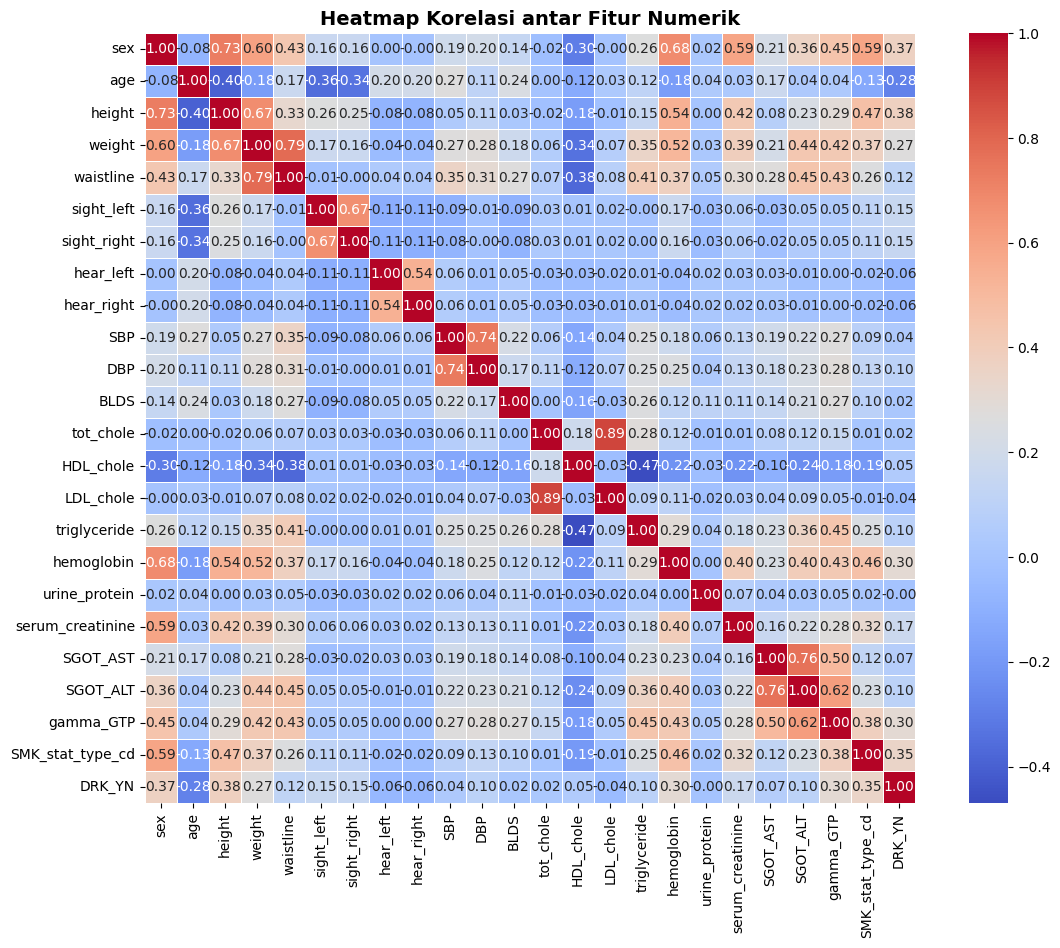

In [24]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur Numerik", fontsize=14, weight='bold')
plt.show()

In [25]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = upper.stack().reset_index()
high_corr.columns = ['Fitur 1', 'Fitur 2', 'Korelasi']
high_corr = high_corr[high_corr['Korelasi'].abs() > 0.85].sort_values(by='Korelasi', ascending=False)

print("Pasangan fitur numerik dengan korelasi tinggi (> 0.85):")
display(high_corr)

Pasangan fitur numerik dengan korelasi tinggi (> 0.85):


,Fitur 1,Fitur 2,Korelasi
211,tot_chole,LDL_chole,0.885739


In [26]:
numerik = ['age', 'height', 'weight', 'waistline','sight_left', 'sight_right',
           'SBP', 'DBP', 'BLDS','tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 
           'serum_creatinine','SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

scaler = RobustScaler()

X_train[numerik] = scaler.fit_transform(X_train[numerik])
X_test[numerik] = scaler.transform(X_test[numerik])
X_val[numerik] = scaler.transform(X_val[numerik])

In [27]:
X_train.head(20)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
565920,0,-0.8,-0.666667,-0.360800,-0.882353,0.000000,0.000000,1.0,1.0,-0.555279,...,0.286806,0.326087,-0.668390,-0.545455,1.0,0.000000,-0.234605,-0.436381,-0.557185,1.0
616392,0,-0.8,0.333333,-1.192899,-1.397059,0.338261,0.752259,1.0,1.0,-0.791665,...,-0.264007,-0.173913,-0.608629,-0.363636,1.0,-0.333333,-0.360429,-1.592460,-0.557185,1.0
294123,1,0.2,0.666667,1.444285,0.794118,0.338261,-0.413998,1.0,1.0,0.052960,...,-1.251990,-0.217391,1.275046,0.636364,1.0,0.333333,-0.114636,0.615044,0.335019,2.0
659006,0,0.2,-0.333333,-1.192899,-1.213235,0.000000,0.000000,1.0,1.0,-1.626642,...,0.668014,-0.108696,-0.224554,-1.454545,1.0,-0.333333,-0.114636,0.074009,-0.275118,1.0
240093,0,1.2,-0.666667,0.925285,1.764706,-1.285996,-0.661739,1.0,1.0,0.656403,...,-1.098063,-0.282609,0.320146,-0.318182,1.0,-0.333333,-0.360429,0.000000,-0.557185,1.0
62632,0,-0.6,-0.333333,-0.756013,-0.941176,0.000000,0.000000,1.0,1.0,-1.424032,...,0.546682,-0.695652,-0.819695,-0.818182,1.0,0.333333,-0.360429,-0.906850,-0.934831,1.0
662507,1,0.2,0.333333,0.925285,0.147059,1.285996,-0.195475,1.0,1.0,0.608239,...,-0.681784,1.108696,0.560640,1.000000,1.0,1.333333,0.413504,1.051425,1.216663,3.0
135999,1,-0.2,0.333333,1.192899,0.294118,-0.195475,-0.947735,1.0,1.0,1.591980,...,-0.050827,0.608696,-0.036881,0.363636,1.0,0.666667,0.597788,0.397976,-0.156864,2.0
836383,0,1.0,-0.666667,0.331904,0.323529,-0.413998,0.338261,1.0,1.0,0.983741,...,0.462737,1.065217,0.463028,0.636364,1.0,-0.333333,-1.102326,0.338483,-0.156864,1.0
232221,1,0.6,0.333333,0.925285,1.250000,0.338261,0.000000,1.0,1.0,-0.107258,...,-0.377083,0.326087,-0.796958,-0.272727,1.0,0.000000,-0.360429,-0.653448,0.802104,2.0


# Model

## TabNet

In [28]:
X_train_np = X_train.to_numpy().astype('float32')
X_val_np = X_val.to_numpy().astype('float32')
X_test_np = X_test.to_numpy().astype('float32')

y_train_np = y_train.to_numpy().astype('int64')
y_val_np = y_val.to_numpy().astype('int64')
y_test_np = y_test.to_numpy().astype('int64')

In [29]:
tabnet_model = TabNetClassifier(
    n_d=64,
    n_a=64,
    n_steps=5,
    gamma=0.9,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type='entmax',
    seed=42
)

history = tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_train_np, y_train_np), (X_val_np, y_val_np)],
    eval_name=['train', 'val'],
    eval_metric=['accuracy', 'auc'],
    max_epochs=200,
    patience=20,
    batch_size=256,
    virtual_batch_size=128
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.53206 | train_accuracy: 0.7369  | train_auc: 0.82001 | val_accuracy: 0.73572 | val_auc: 0.81779 |  0:02:18s
epoch 1  | loss: 0.52118 | train_accuracy: 0.73714 | train_auc: 0.8198  | val_accuracy: 0.73536 | val_auc: 0.8177  |  0:04:37s
epoch 2  | loss: 0.51918 | train_accuracy: 0.73655 | train_auc: 0.82124 | val_accuracy: 0.73554 | val_auc: 0.81878 |  0:06:57s
epoch 3  | loss: 0.51913 | train_accuracy: 0.73818 | train_auc: 0.82142 | val_accuracy: 0.73623 | val_auc: 0.81924 |  0:09:16s
epoch 4  | loss: 0.51849 | train_accuracy: 0.73842 | train_auc: 0.82191 | val_accuracy: 0.73721 | val_auc: 0.81969 |  0:11:36s
epoch 5  | loss: 0.51832 | train_accuracy: 0.73678 | train_auc: 0.82151 | val_accuracy: 0.73461 | val_auc: 0.81917 |  0:13:55s
epoch 6  | loss: 0.51762 | train_accuracy: 0.73744 | train_auc: 0.82127 | val_accuracy: 0.73543 | val_auc: 0.8191  |  0:16:15s
epoch 7  | loss: 0.51665 | train_accuracy: 0.73849 | train_auc: 0.82221 | val_accuracy: 0.73575 | val_auc: 0.81

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [30]:
from sklearn.metrics import roc_auc_score

y_pred_proba_tabnet = tabnet_model.predict_proba(X_test_np)[:, 1]

auc_tabnet = roc_auc_score(y_test_np, y_pred_proba_tabnet)
print(f"AUC TabNet: {auc_tabnet:.4f}")

AUC TabNet: 0.8236


Classification Report (TabNet - Test Set):
              precision    recall  f1-score   support

          No       0.74      0.74      0.74     99169
         Yes       0.74      0.74      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



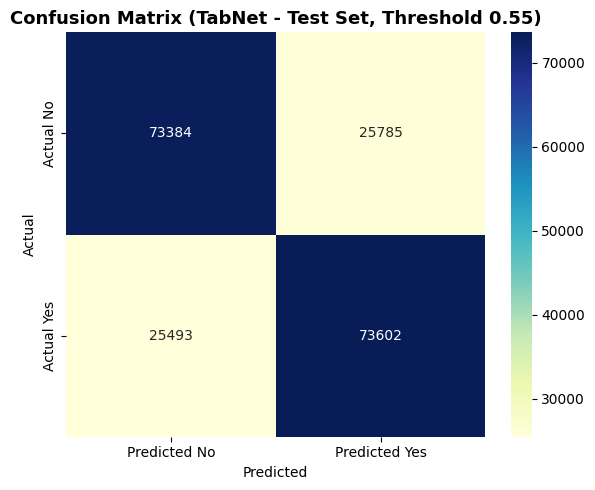

In [31]:
y_test_pred = (tabnet_model.predict_proba(X_test_np)[:, 1] > 0.5).astype(int)

print("Classification Report (TabNet - Test Set):")
print(classification_report(y_test_np, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test_np, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix (TabNet - Test Set, Threshold 0.55)', fontsize=13, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=7,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

model_rf.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)

Classification Report (Rndom Forest-Test Set)
              precision    recall  f1-score   support

          No       0.72      0.71      0.72     99169
         Yes       0.71      0.73      0.72     99095

    accuracy                           0.72    198264
   macro avg       0.72      0.72      0.72    198264
weighted avg       0.72      0.72      0.72    198264



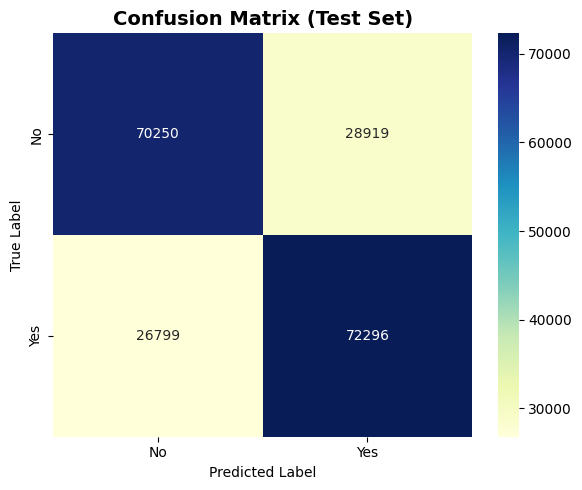

AUC Random Forest: 0.8007


In [33]:
print("Classification Report (Rndom Forest-Test Set)")
print(classification_report(y_test, y_test_pred, target_names=['No', 'Yes']))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Skor AUC
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC Random Forest: {auc_rf:.4f}")